<a href="https://colab.research.google.com/drive/1TPlDVlWCwfXB0lbTJLNnHCoFwIjVgoNH?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

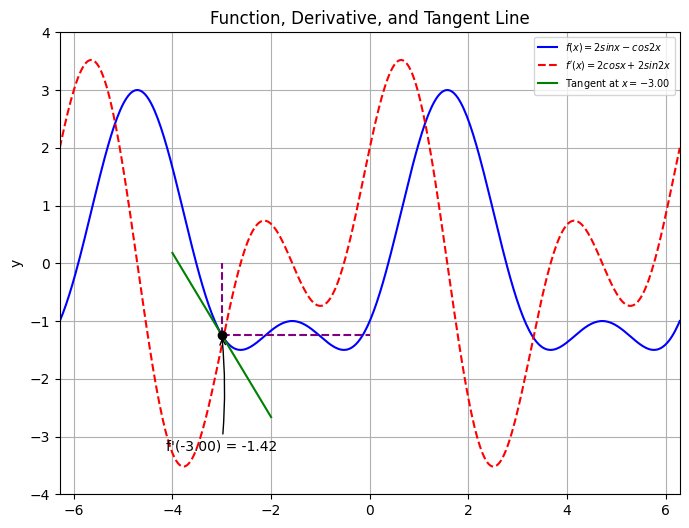

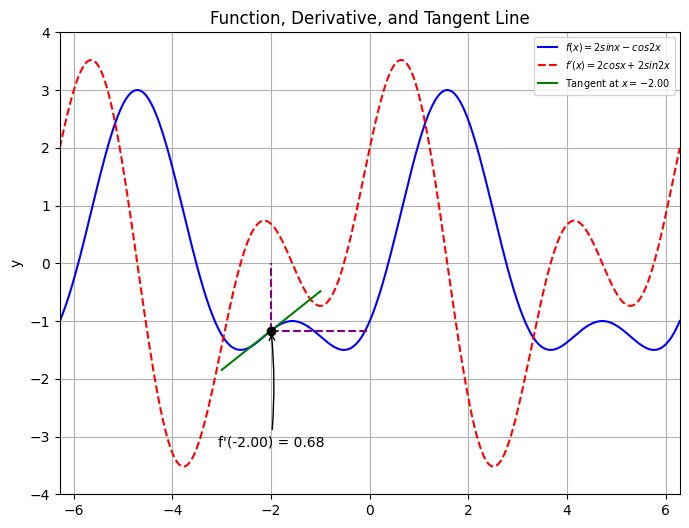

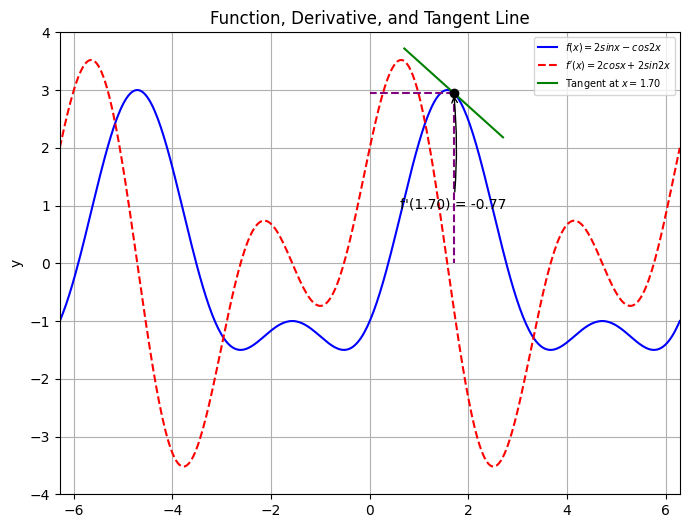

In [89]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2 * np.sin(x) - np.cos(2 * x)

def f_prime(x):
    return 2 * np.cos(x) + 2 * np.sin(2 * x)

def beauty_derivative_plot(x0):
    x = np.linspace(-2*np.pi, 2*np.pi, 400)
    y_f = f(x)
    y_f_prime = f_prime(x)
    x_tangent = np.linspace(x0 - 1, x0 + 1, 400)
    y_tangent = f_prime(x0) * (x_tangent - x0) + f(x0)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y_f, label=r'$f(x) = 2sinx - cos2x$', color='blue')
    plt.plot(x, y_f_prime, label=r"$f'(x) = 2cosx + 2sin2x$", color='red', linestyle='--')
    plt.plot(x_tangent, y_tangent, label=r"Tangent at $x = %.2f$" % x0, color='green')
    
    plt.scatter(x0, f(x0), color='black', zorder=5)
    
    plt.annotate(
        f"f'({x0:.2f}) = {f_prime(x0):.2f}",  
        xy=(x0, f(x0)),  
        xytext=(x0, f(x0) - 2),
        arrowprops=dict(
            arrowstyle="->",
            color='black',
            connectionstyle="arc3,rad=0.05"
        ),
        fontsize=10, color='black', ha='center'
    )


    plt.xlim([-2*np.pi, 2*np.pi])
    plt.ylim([-4, 4])
    
    plt.plot([x0, x0], [f(x0), 0], '--', color='purple') 
    plt.plot([x0, 0], [f(x0), f(x0)], '--', color='purple')
    
    plt.ylabel('y')
    plt.title('Function, Derivative, and Tangent Line')
    
    plt.legend(fontsize=7)
    plt.grid(True)
    plt.show()

beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)


## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

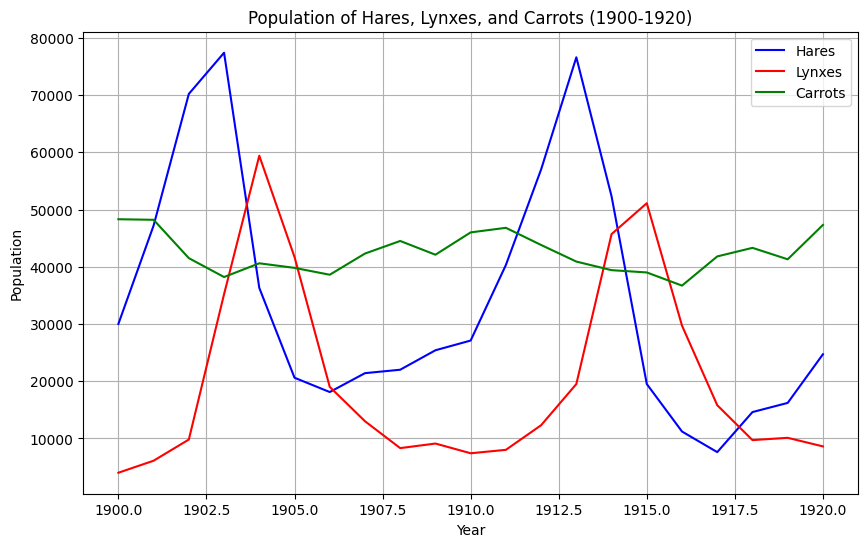

In [90]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("assets/populations.txt", skiprows=1)

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

plt.figure(figsize=(10, 6))
plt.plot(years, hares, label="Hares", color='blue')
plt.plot(years, lynxes, label="Lynxes", color='red')
plt.plot(years, carrots, label="Carrots", color='green')

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population of Hares, Lynxes, and Carrots (1900-1920)")
plt.legend()
plt.grid(True)

plt.show()


- Find which year each species had the largest population. Mark these years in the plot of populations.

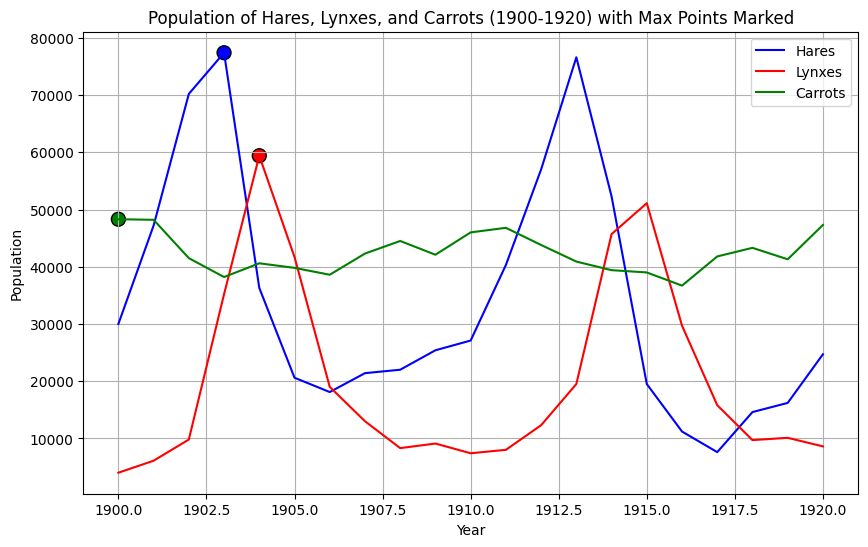

In [92]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("assets/populations.txt", skiprows=1)

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

max_hare_year, max_hare_pop = years[np.argmax(hares)], np.max(hares)
max_lynx_year, max_lynx_pop = years[np.argmax(lynxes)], np.max(lynxes)
max_carrot_year, max_carrot_pop = years[np.argmax(carrots)], np.max(carrots)

plt.figure(figsize=(10, 6))
plt.plot(years, hares, label="Hares", color='blue')
plt.plot(years, lynxes, label="Lynxes", color='red')
plt.plot(years, carrots, label="Carrots", color='green')

plt.scatter([max_hare_year, max_lynx_year, max_carrot_year],
            [max_hare_pop, max_lynx_pop, max_carrot_pop],
            color=['blue', 'red', 'green'], s=100, edgecolor='black')

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population of Hares, Lynxes, and Carrots (1900-1920) with Max Points Marked")
plt.legend()
plt.grid(True)

plt.show()


- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

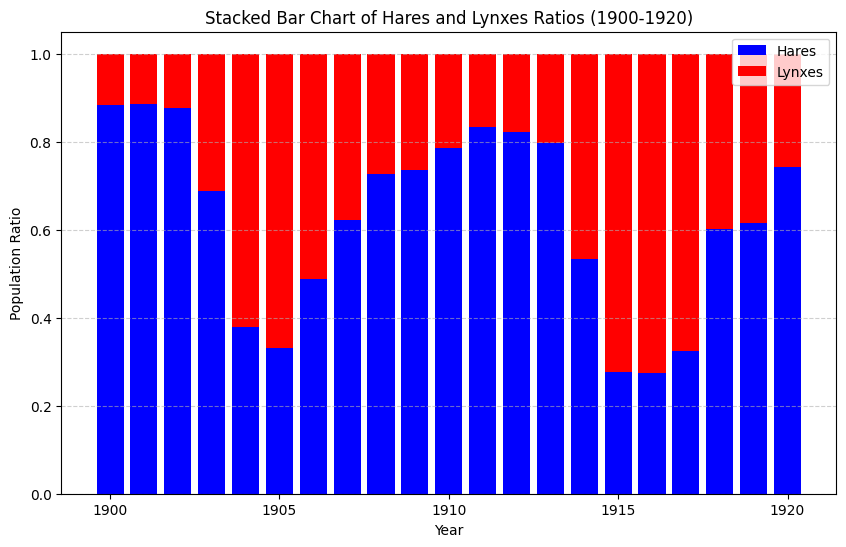

In [95]:
import matplotlib.pyplot as plt

data = np.loadtxt("assets/populations.txt", skiprows=1)

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

hare_ratio = hares / (hares + lynxes)
lynx_ratio = 1 - hare_ratio

plt.figure(figsize=(10, 6))
plt.bar(years, hare_ratio, label="Hares", color='blue')
plt.bar(years, lynx_ratio, bottom=hare_ratio, label="Lynxes", color='red')

plt.xlabel("Year")
plt.ylabel("Population Ratio")
plt.title("Stacked Bar Chart of Hares and Lynxes Ratios (1900-1920)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

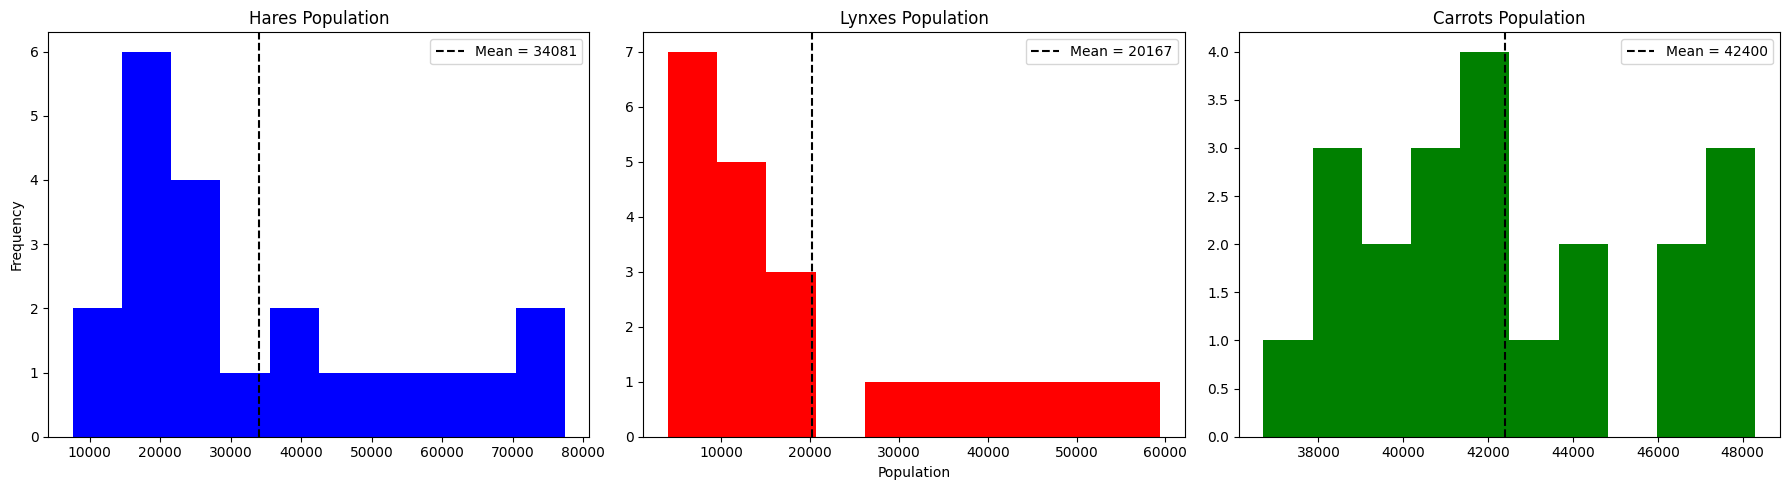

In [98]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("assets/populations.txt", skiprows=1)

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

mean_hares, std_hares = np.mean(hares), np.std(hares)
mean_lynxes, std_lynxes = np.mean(lynxes), np.std(lynxes)
mean_carrots, std_carrots = np.mean(carrots), np.std(carrots)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(hares, bins=10, color='blue')
axes[0].axvline(mean_hares, color='black', linestyle='dashed', linewidth=1.5, label=f'Mean = {mean_hares:.0f}')
axes[0].set_title('Hares Population')
axes[0].set_ylabel('Frequency')
axes[0].legend()

axes[1].hist(lynxes, bins=10, color='red')
axes[1].axvline(mean_lynxes, color='black', linestyle='dashed', linewidth=1.5, label=f'Mean = {mean_lynxes:.0f}')
axes[1].set_title('Lynxes Population')
axes[1].set_xlabel('Population')
axes[1].legend()

axes[2].hist(carrots, bins=10, color='green')
axes[2].axvline(mean_carrots, color='black', linestyle='dashed', linewidth=1.5, label=f'Mean = {mean_carrots:.0f}')
axes[2].set_title('Carrots Population')
axes[2].legend()

plt.tight_layout()
plt.show()


- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

Species with largest population each year: ['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


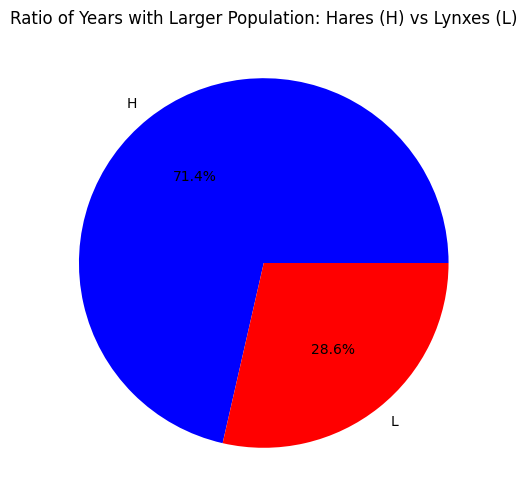

In [80]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("assets/populations.txt", skiprows=1)

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]

species_comparison = np.where(hares > lynxes, 'H', 'L')

unique, counts = np.unique(species_comparison, return_counts=True)
species_counts = dict(zip(unique, counts))

result_list = species_comparison.tolist()
print("Species with largest population each year:", result_list)

plt.figure(figsize=(6, 6))
plt.pie(species_counts.values(), labels=species_counts.keys(), autopct='%1.1f%%', colors=['blue', 'red'])
plt.title("Ratio of Years with Larger Population: Hares (H) vs Lynxes (L)")
plt.show()


- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

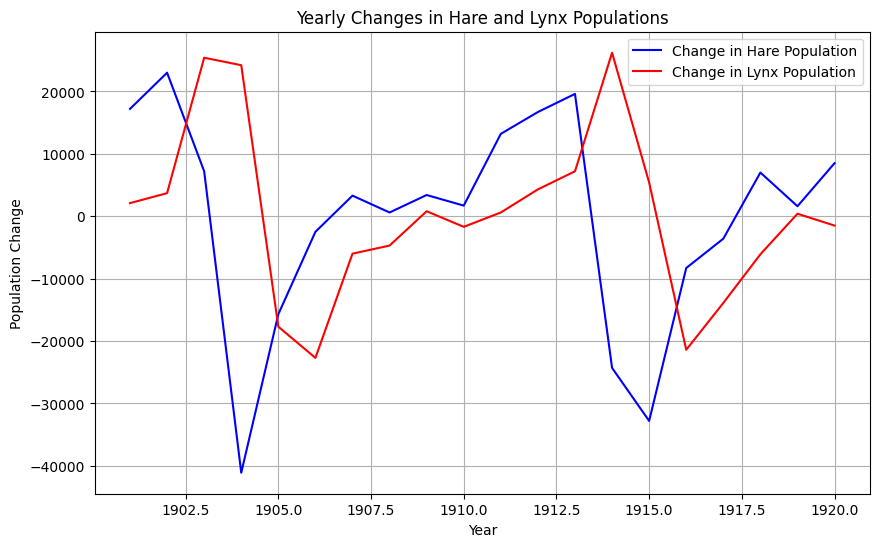

-0.1780136594118296


In [100]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("assets/populations.txt", skiprows=1)

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]

hare_changes = np.diff(hares)
lynx_changes = np.diff(lynxes)
years_diff = years[1:]

plt.figure(figsize=(10, 6))
plt.plot(years_diff, hare_changes, label="Change in Hare Population", color='blue')
plt.plot(years_diff, lynx_changes, label="Change in Lynx Population", color='red')
plt.xlabel("Year")
plt.ylabel("Population Change")
plt.title("Yearly Changes in Hare and Lynx Populations")
plt.legend()
plt.grid(True)
plt.show()

correlation_coefficient = np.corrcoef(hare_changes, lynx_changes)[0, 1]
print(correlation_coefficient)


- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

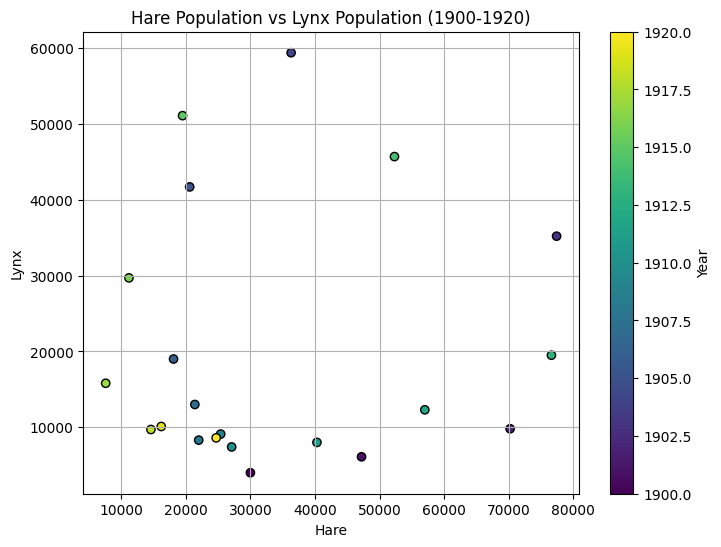

In [101]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("assets/populations.txt", skiprows=1)

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(hares, lynxes, c=years, cmap='viridis', edgecolor='black')
plt.xlabel("Hare")
plt.ylabel("Lynx")
plt.title("Hare Population vs Lynx Population (1900-1920)")
plt.colorbar(scatter, label='Year')
plt.grid(True)
plt.show()


- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [105]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("assets/populations.txt", skiprows=1)

years = data[:, 0]
hares = data[:, 1]

coefficients = np.polyfit(years[:-1], hares[:-1], 1)
slope, intercept = coefficients
estimated_hare_1920 = slope * years[-1] + intercept
error_ratio = np.abs(estimated_hare_1920 - hares[-1]) / hares[-1]

print("Estimate: ", estimated_hare_1920, "\nReal value: ", hares[-1], "\nError: ", error_ratio)



Estimate:  19775.789473683108 
Real value:  24700.0 
Error:  0.19936075005331547
